# Drzewa losowe

Poniższy materiał prezentuje przykładowe zastosowanie drzew losowych do tworzenia modeli uczenia maszynowego


Rozpocznijmy od wczytania klasycznego (prostego) zbioru danych Iris

In [1]:
from sklearn import datasets

dataset = datasets.load_iris()


# Processing

Dokonajmy ich konwersji na nasze ulubione pakiety numpy i pandas

In [2]:
import numpy as np
import pandas as pd

size = len(dataset.data)

data = np.concatenate([dataset.data, np.reshape(dataset.target, (size,1))], axis = 1)
column_names = dataset.feature_names[:]
column_names.append('target')
df = pd.DataFrame(data, columns = column_names, copy = True)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

Obejrzyjmy przykładowy wykres tego zbioru

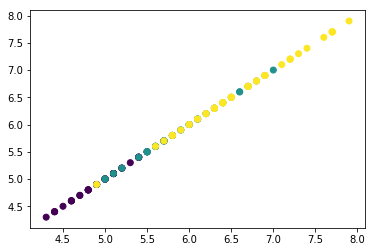

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,0],c=df['target'])
plt.show()



Przyjrzyjmy się w szczególności jak wyglądają wewnętrzne zależności między zmiennymi

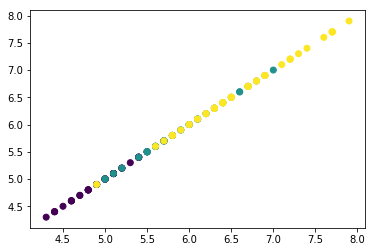

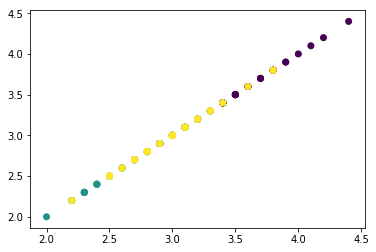

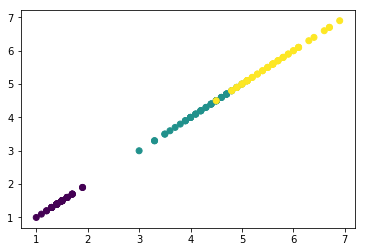

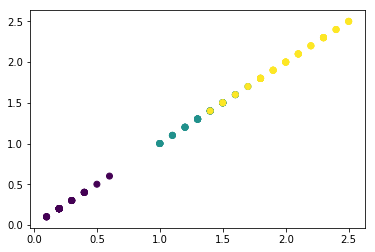

In [5]:
for column_name in df.columns:
    if column_name == 'target': continue
    plt.scatter(df[column_name],df[column_name],c=df['target'])
    plt.show()

# Drzewa decyzyjne dane IRIS 

## Podział na dane treningowe i testowe

Przeprowadźmy prosty podział naszego zbioru na testowy i treningowy

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y)

## Drzewa C4.5

Funkcją pozwalająca na stosowanie drzew decyzyjnych jest mode Decision Tree Classifier

*class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)*

Dla nas do najistotniejszych parametrów należeć będą 

*criterion{“gini”, “entropy”}, default=”gini” The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.*


Użyjemy w początkowej próbie algorytmu opartego o id3 i c4.5 czyli używającego entropi

In [7]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy') 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

In [9]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,13,0,0
1,0,11,0
2,0,1,13


Tak wygląda miara policzona na parze zbioru trening-test. Porównajmy jeszcze w pomiarze cross walifacji

In [10]:
from sklearn.model_selection import cross_val_score
ilosc_podzbiorow = 5;
scores = cross_val_score(classifier, X, y, cv = ilosc_podzbiorow, scoring = 'accuracy' )
pd.DataFrame(scores)



,0
0,0.966667
1,0.966667
2,0.900000
3,0.966667
4,1.000000


# Drzewa CART

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='gini') 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [13]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,13,0,0
1,0,11,0
2,0,0,14


Tak wygląda miara policzona na parze zbioru trening-test. Porównajmy jeszcze w pomiarze cross walifacji

In [14]:
from sklearn.model_selection import cross_val_score
ilosc_podzbiorow = 5;
scores = cross_val_score(classifier, X, y, cv = ilosc_podzbiorow, scoring = 'accuracy' )
pd.DataFrame(scores)

,0
0,0.966667
1,0.966667
2,0.900000
3,0.966667
4,1.000000


# Zbiór Mammals vs Reptiles
Innym przykładem zbioru jest np. Ssaki vs Gady

In [15]:
df2 = pd.DataFrame({"toothed":[True,True,True,False,True,True,True,True,True,False],
                     "hair":[True,True,False,True,True,True,False,False,True,False],
                     "breathes":[True,True,True,True,True,True,False,True,True,True],
                     "legs":[True,True,False,True,True,True,False,False,True,True],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])
X2 = df2[["toothed","hair","breathes","legs"]]
y2 = df2["species"]
y2.head()

0     Mammal
1     Mammal
2    Reptile
3     Mammal
4     Mammal
Name: species, dtype: object

W takiej postaci jednak nasze drzewa nie działają - zmienne typu string nie są domyślnie konwertowane do poprawnie obsługiwanych

In [16]:
df2['target'] = df2["species"].apply(lambda x: 1 if x == 'Mammal' else 0)
df3 = df2.drop('species', axis =1)
df3.head()

,toothed,hair,breathes,legs,target
0,True,True,True,True,1
1,True,True,True,True,1
2,True,False,True,False,0
3,False,True,True,True,1
4,True,True,True,True,1


Dokonajmy podziału zbioru

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X2, y2)

In [18]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy') 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [20]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,2,0
1,0,1


In [21]:
from sklearn.model_selection import cross_val_score
ilosc_podzbiorow = 5;
scores = cross_val_score(classifier, X2, y2, cv = ilosc_podzbiorow, scoring = 'accuracy' )
pd.DataFrame(scores)

/home/dyschemist/Workspace/virt-env/WAD/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


,0
0,1.0
1,1.0
2,1.0
3,0.5
4,1.0


# Regresja nieliniowa

Dla przykładu regresji nieliniowej wykorzystamy zbiór o danych cukrzyków



In [22]:
from sklearn import datasets

dataset3 = datasets.load_diabetes()

In [23]:
import numpy as np
import pandas as pd

size = len(dataset3.data)

data3 = np.concatenate([dataset3.data, np.reshape(dataset3.target, (size,1))], axis = 1)
column_names = dataset3.feature_names[:]
column_names.append('target')
df3 = pd.DataFrame(data3, columns = column_names, copy = True)
df3.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [24]:
X3 = df3.drop('target', axis = 1)
y3 = df3['target']
X3.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Wykorzystamy tym razem (z uwagi na typ regresyjny zadania) drzewo regresyjne. Zgodnie z jego dokumentacją:

*class sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)*

gdzie m.in. *criterion{“mse”, “friedman_mse”, “mae”}, default=”mse”*

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X3, y3)

In [26]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred)

6388.855855855856

In [28]:
from sklearn.model_selection import cross_val_score
ilosc_podzbiorow = 5;
scores = cross_val_score(regressor, X3, y3, cv = ilosc_podzbiorow, scoring = 'neg_mean_squared_error' )
pd.DataFrame(scores)

,0
0,-6464.056180
1,-6575.247191
2,-6453.170455
3,-5855.659091
4,-7825.306818
